In [1]:
from mt_scores import get_scores_auto
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random as rand

2022-11-04 12:31:49.014565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 12:31:49.014584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def mean(listvals):
    return sum(listvals)/len(listvals)

In [3]:
# This is a notebook to examine errors in the selection process of our efficient lattice with CQEUT
# We'll look at a couple of examples specifically to get our insights
def get_pickle(fname):
    f = open(fname, 'rb')
    return pickle.load(f)

# Load in necessary data for a given graph
def init_data(lang, chosen):
    gbase = "detest_reversed/"
    lpbase = "germanlatpreds"
    expldir = "germantest_exploded/"
    if lang=='fr-en':
        gbase = "frtest_reversed/"
        lpbase = "frenchlatpreds"
        expldir = "frenchtest_exploded/"
        
    graph = get_pickle(gbase+str(chosen))
    lpredsall = pd.read_csv(lpbase)
    # tuple in the format of scores, cands, ref, source
    explvals = get_pickle(expldir+str(chosen))
    # TODO this is probably wrong
    return graph, lpredsall.loc[chosen], explvals

CHOSEN = 0
LANG = "fr-en"

def gendata_scores(hyps, srcs, refs, mname, lang):
    cqeut = get_scores_auto(hyps, srcs, refs, "cqeut", mname)
    cqe = get_scores_auto(hyps, srcs, refs, "cqe", "")
    posthoc = get_scores_auto(hyps, srcs, refs, "posthoc", lang)
    comet = get_scores_auto(hyps, srcs, refs, "comet", "")
    return cqe, posthoc, comet, cqeut

    
# Get all the appropriate scores based on the data that we got
def generate_scores(lang, chosen):
    g, lp, explode = init_data(lang, chosen)
    # get inputs to pass into stuff, last index is one selected by lattice
    hyps = explode[1]+[lp['ahyp']]
    refs = [explode[2]]*len(hyps)
    srcs = [explode[3]]*len(hyps)
    if lang=="fr-en":
        mname = "./torchsaved/maskedcont4.pt"
    cqe, posthoc, comet, cqeut = gendata_scores(hyps, srcs, refs, mname, lang )
    return hyps, cqe, posthoc, comet, cqeut

In [7]:
comsco = get_scores_auto(lpreds['ahyp'], lpreds['src'], lpreds['ref'], "comet", "")

wmt20-comet-da is already in cache.
Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Encoder model frozen.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Predicting: 0it [00:00, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Predicting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.73it/s]

To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Predicting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.66it/s]


In [8]:
mean(comsco)

0.628337462774303

In [ ]:
GFILE = 'frenchlatpreds3.csv'
lpreds = pd.read_csv(GFILE)

def get_act_hyps(hyplist, cutoff):
    res = []
    for h in hyplist:
        cind = h[3:].index(cutoff)+len(cutoff)+3
        res.append(h[cind:])
    return res

lpreds['ind'] = lpreds['Unnamed: 0']
lpreds = lpreds.dropna()
lpreds['ahyp'] = get_act_hyps(lpreds['hyp'], "<s>")
frname = "./torchsaved/maskedcont4.pt"
cqe, comet, posthoc, cqeut = gendata_scores(lpreds['ahyp'], lpreds['src'], lpreds['ref'], frname, "fr-en")

In [5]:
#Slpreds.to_csv("torchsaved/lpreds1updated.csv")

In [15]:
lpreds['comet'] = comsco

In [6]:
lpreds['cqe'] = cqe
lpreds['cqeut'] = cqeut
lpreds['posthoc'] = posthoc
lpreds['comet'] = comet

In [18]:
mean(tpreds['cqeut'])

0.9117810583114624

In [16]:
tpreds = lpreds[lpreds['ind']<75]
tuns = tpreds['ind'].unique()

In [20]:
# Get all the appropriate scores based on the data that we got
def genmany(lang):
    ahyps, arefs, asrcs = [], [], []
    ind = 0
    lens = []
    while ind<76:
        try:
            g, lp, explode = init_data(lang, ind)
            # get inputs to pass into stuff, last index is one selected by lattice
            hyps = explode[1]+[lp['ahyp']]
            refs = [explode[2]]*len(hyps)
            srcs = [explode[3]]*len(hyps)
            lens.append(len(hyps))
            ahyps.extend(hyps)
            arefs.extend(refs)
            asrcs.extend(srcs)
            ind+=1
        except:
            continue
    if lang=="fr-en":
        mname = "./torchsaved/maskedcont4.pt"
    cqeut = get_scores_auto(ahyps, asrcs, arefs, "cqeut", mname)
    with open('bigcqeut.pickle', 'wb') as handle:
        pickle.dump(cqeut, handle)
    cqe = get_scores_auto(ahyps, asrcs, arefs, "cqe", "")
    with open('bigcqe.pickle', 'wb') as handle:
        pickle.dump(cqe, handle)
    posthoc = get_scores_auto(ahyps, asrcs, arefs, "posthoc", lang)
    with open('bigposthoc.pickle', 'wb') as handle:
        pickle.dump(posthoc, handle)
    comet = get_scores_auto(ahyps, asrcs, arefs, "comet", "")
    with open('bigcomet.pickle', 'wb') as handle:
        pickle.dump(comet, handle)
    return ahyps, cqe, posthoc, comet, cqeut, lens

# get a specific ind from all the generated stuff
def extract_bg_ind(bgres, ind, asdict=True):
    ahyps, cqe, posthoc, comet, cqeut, lens = bigres
    sind = sum(lens[:ind])
    end = sind+lens[ind]
    # TODO watch out this is kind of hardcoded
    lp = lpredsall.loc[ind]
    # consolidate as a dict
    if asdict:
        res = {
            "hyps": ahyps[sind:end],
            "cqe": cqe[sind:end],
            "posthoc": posthoc[sind:end],
            "comet": comet[sind:end],
            "cqeut": cqeut[sind:end],
            "src": lp["src"],
            "ref": lp["ref"]
        }
        return res
    return ahyps[sind:end], cqe[sind:end], posthoc[sind:end], comet[sind:end], cqeut[sind:end]

# Compare what's selected by the algorithm vs what exploded paths have
# TODO add in params
# we can visualize where lattice is vs distrib of actual stuff, should run 
# whole pipeline for an entire lattice / generate stuff
def compare_latselect(bgres, ind, terms, old=False):
    lat = extract_bg_ind(bgres, ind)
    res = {}
    for t in terms:
        res[t+"mean"] = sum(lat[t])/len(lat[t])
        res[t+"select"] = lat[t][-1]
        res[t+"max"] = max(lat[t])
        res[t+"random"] = rand.choice(lat[t])
    return res

def rercompare(bgres, ind, terms):
    lat = extract_bg_ind(bgres, ind)
    res = {}
    for t in terms:
        ind = lat[t].index(max(lat[t]))
        if t=='posthoc':
            ind = lat[t].index(min(lat[t]))
        res[t+"rerank"] = lat["comet"][ind]
        res[t+"cand"] = lat["hyps"][ind]
    res["effcand"] = lat["hyps"][-1]
    return res

def getrer_scatter(bgres, terms, xterm, yterm, lfilter=None, useinds = False):
    allens = len(bgres[-1])
    xres = []
    yres = []
    rang = range(0, allens)
    if useinds:
        rang = tuns
    for a in rang:
        if lfilter:
            # function to ignore lengths that meet certain conditions
            if lfilter(bgres[-1][a]):
                continue
        lstats = rercompare(bgres, a, terms)
        xres.append(lstats[xterm])
        yres.append(lstats[yterm])
    return xres, yres

def getcomp_scatter(bgres, terms, xterm, yterm, lfilter=None, useinds = False):
    allens = len(bgres[-1])
    xres = []
    yres = []
    rang = range(0, allens)
    if useinds:
        rang = tuns
    for a in rang:
        if lfilter:
            # function to ignore lengths that meet certain conditions
            if lfilter(bgres[-1][a]):
                continue
        lstats = compare_latselect(bgres, a, terms)
        xres.append(lstats[xterm])
        yres.append(lstats[yterm])
    return xres, yres

# TODO try above pipeline on like 50 lattices, get the data / vis for each of those
# Answer questions or expand analysis
lpredsall = pd.read_csv("torchsaved/frenchlatpreds")

In [23]:
utbest, qebest = getrer_scatter(bigres, ["cqeut", "cqe"], "cqeutrerank", "cqererank")
utbest, bbest = getrer_scatter(bigres, ["cqeut", "cqe", "comet"], "cqeutrerank", "cometrerank")

In [24]:
utcands, effcands = getrer_scatter(bigres, ["cqeut", "cqe"], "cqeutcand", "effcand")

In [56]:
def mean(l):
    return sum(l)/len(l)

In [25]:
mean(qebest)

0.6797885943302199

In [179]:
def printdiff(ind, utc, effc):
    print(utc[ind])
    print(effc[ind])

printdiff(2, utcands, effcands)

Another variable is the degree to which other developed countries’ monetary policies will ease.
 The other variable is the extent to which other developed countries will ease their monetary policies.


In [140]:
# leaves only if len less than 1000
def under1000(lenval):
    #print(lenval)
    return lenval>1000

# leaves only if len ge than 1000
def over1000(lenval):
    return lenval<=1000

In [31]:
filt = None
means, selected = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutselect", filt, True)
means, randlist = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutrandom", filt, True)
means, maxes = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutmax", filt, True)
diffs = [maxes[i]-tpreds.iloc[i]['cqeut'] for i in range(len(maxes))]
rdiffs = [maxes[i]-randlist[i] for i in range(len(maxes))]

In [35]:
maxes

[0.816840410232544,
 0.9729751348495483,
 1.1208709478378296,
 0.8822489976882935,
 1.0366191864013672,
 1.2628331184387207,
 1.2351996898651123,
 1.1398801803588867,
 0.8183314800262451,
 1.5196874141693115,
 1.2325668334960938,
 1.1653532981872559,
 1.1745609045028687,
 1.2024933099746704,
 0.7652642726898193,
 0.6443833112716675,
 1.2501180171966553,
 0.6707605123519897,
 1.3296961784362793,
 1.233210802078247,
 1.127038598060608,
 1.0943902730941772,
 0.9024837017059326,
 1.1244144439697266,
 1.278916358947754,
 0.19798210263252258,
 1.0214943885803223,
 1.064499855041504,
 1.2555193901062012,
 1.0909152030944824,
 0.7324851751327515,
 1.0603841543197632,
 0.7721091508865356,
 1.2491137981414795,
 1.1255011558532715,
 1.121659517288208,
 1.018066644668579,
 1.2563560009002686,
 0.9303861856460571,
 1.022241473197937,
 1.075598955154419,
 0.7905523777008057,
 0.960492730140686,
 1.2031536102294922,
 1.4098764657974243,
 1.2780531644821167,
 1.1191295385360718,
 1.124305248260498,
 0

means

In [45]:
print(sum(rdiffs)/len(rdiffs))
print(sum(diffs)/len(diffs))

0.17575053417164346
0.09908064767934274


In [48]:
sum(maxes)/len(maxes)

1.0407548456088356

In [51]:
sum(tpreds['cqeut'])/len(tpreds['cqeut'])

0.9416741979294929

In [52]:
sum(randlist)/len(randlist)

0.8650043114371921

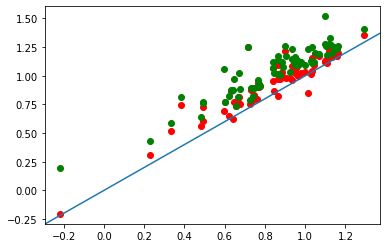

In [53]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1)
ax.scatter(means, tpreds['cqeut'], color='r')
ax.scatter(means, maxes, color='g')
#ax.scatter(means, randlist, color='b')

In [67]:
mean(utbest)

0.5750998928652782

In [32]:
lpredsall.loc[0]

Unnamed: 0                                                      0
Unnamed: 0.1                                                    0
src             Après tout, en tant que journaliste d'investig...
hyp             <s> Après tout, en tant que journaliste d'inve...
ref             After all, as a campaigning investigative jour...
ahyp             After all, as an investigative reporter in th...
scos                                                     0.334722
Name: 0, dtype: object

In [ ]:
#hyps, cqe, posthoc, comet, cqeut =  generate_scores("fr-en", 0)

In [22]:
# ahyps, cqe, posthoc, comet, cqeut, lens
# bigres = genmany("fr-en")
# using loaded
with open('torchsaved/bigreslattice.pickle', 'rb') as handle:
    bigres = pickle.load(handle)

In [27]:
latvals1['hyps'][-1]

' As Iran sought to extend its influence and advance its interests, as well as those of its Shi a allies, talks with the Security Council came to be closely linked to its region-wide ambition s.'

In [ ]:
#with open('bigreslattice.pickle', 'wb') as handle:
#    pickle.dump(bigres, handle)

In [12]:
cqeut[-1]

0.6277338862419128